# **Laboratorio 1**
### **Integrantes:**
* Maria Camila Parra Díaz (201819464)
* Esteban Emmanuel Ortiz Morales (201913613)  
* Sergio Julian Zona Moreno (201914936)

In [ ]:
# Declaración de la semilla
seed = 161

# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

import numpy as np
np.random.seed(seed)

# Para preparar los datos
# ------------------------
from sklearn import tree as tr
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 

#Librerías para la visualización
# -------------------------
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 

In [ ]:
# Se cargan los datos. 
df_health=pd.read_csv('202120_Laboratorio_1_datos_SaludAlpes_diagnosticos_dataset.csv', sep=';', encoding = 'utf-8', index_col=False)

# Se reemplazan los espacios de los nombres de las columnas por '_'
df_health.columns = df_health.columns.str.replace(' ', '')

In [ ]:
# Cantidad de datos y número de variables
df_health.shape

(768, 11)

In [ ]:
# Mostrar los datos
df_health.head()

,Haircolor,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1


In [ ]:
# Tipos de las variables.
df_health.dtypes

Haircolor                   object
Pregnancies                 object
Glucose                     object
City                        object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                          int64
DiabetesPedigreeFunction    object
Age                          int64
Outcome                     object
dtype: object

In [ ]:
# Descripción breve de los datos.
df_health.describe()

,BMI,Age
count,768.000000,768.000000
mean,289.796875,38.011719
std,116.757554,117.825600
min,0.000000,21.000000
25%,251.750000,24.000000
50%,309.000000,29.000000
75%,359.000000,41.000000
max,671.000000,3256.000000


In [ ]:
# Encontramos que dentro de los datos hay algunos valores '-', que deben ser tomados como valores nulos.
df_health = df_health.replace('-', np.nan)
df_health.isnull().sum().sort_values()

Haircolor                   0
BMI                         0
Age                         0
Pregnancies                 1
Glucose                     1
City                        1
BloodPressure               1
SkinThickness               1
Insulin                     1
DiabetesPedigreeFunction    1
Outcome                     1
dtype: int64

<BarContainer object of 11 artists>

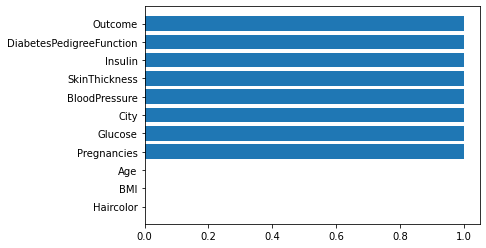

In [ ]:
# Aparentemente, existe una o más filas con valores nulos. Más adelante se depurarán dichos valores.
df_plot = df_health.isnull().sum().sort_values()#/df_health.shape[0]
plt.barh(df_plot.index, df_plot.values)

In [ ]:
# Se efectua una copia de seguridad del df.
df_health_c = df_health.copy()

# Depuración de los datos según las condiciones de las variables y transformación de los tipos de variables.

# Se elimina todo registro que contenga valores nulos representados por '-'.
df_health_c=df_health_c.dropna()

# Hair Color. Variable categórica, se transforma a valores numéricos: Black -> 0, Blue -> 1, Red -> 2.
df_health_c['Haircolor'] = pd.Categorical(df_health_c['Haircolor'])
df_health_c['Haircolor'] = df_health_c['Haircolor'].cat.codes

# Glucose. Variable cuantitativa, se filtran valores mayores a 0. 
df_health_c['Glucose'] = pd.to_numeric(df_health_c['Glucose'])
df_health_c = df_health_c.loc[df_health_c['Glucose'] > 0]

# City. Variable cualitativa, dado que toda la columna solo tiene un valor 'New York', se elimina la columna 
# pues no es significativa en ningún modelo.
df_health_c = df_health_c.drop(['City'], axis=1)

# BloodPressure. Variable cuantitativa, se filtran valores mayores a 0. 
df_health_c['BloodPressure'] = pd.to_numeric(df_health_c['BloodPressure'])
df_health_c = df_health_c.loc[df_health_c['BloodPressure'] > 0]

# Las variables SkinThickness, Pregnancies, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome no presentan anomalías 
# y no requieren ningún tipo de modificacion en los datos. 

# OJOOO: En age hay valores demasiado grandes?! 450 años Y 3256 años? Para revisar.
# Revisar si las otras variables tienen valores dentro de una cota con sentido. (Se encuentren en un intervalo adecuado).

# TODO: Cambiar categoría de las variables. Revisar categóricas en SkLearn.

# Cantidad de datos y número de variables
df_health_c.head()

,Haircolor,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,6,148,72,35,0,336,627,50,1
1,0,1,85,66,29,0,266,351,31,0
2,2,8,183,64,0,0,233,672,32,1
3,0,1,89,66,23,94,281,167,21,0
4,0,0,137,40,35,168,431,2288,33,1


In [ ]:
# Nuevo tamaño y dimensiones de los datos.
df_health_c.shape

(727, 10)